This project is about analyzing the causes of fires in California, particularly mand-made vs. natural, to attempt to predict when fires might be likelier to occur. This project will be analyzing the scale and location of the fires, comparing those factors to the cause, and attempt to find trends that might indicate when/where a fire is likelier to break out.

[insert rationale for why certain data sets were used and how they were prepared after actually doing the work below]
There are two datasets strictly about fires that are going to be looked at. The first is a record of all fires dating back from 1878, although this will be clipped to 1950 to present to match the data available for lightning occurences in California. Both of these datasets have location data, so we can compare yearly fires and thunderstorm occurences for specific regions. This allows us to understand how much of a threat, in terms of fire likelihood, lightning can be. Additionally, there are two more data sets that analyze small(<5000 acres) and large(>=5000 acres) fires over the past five years, so we can focus on both very broad trends over many years, as well as more recent trends that might better help us predict the immediate future.

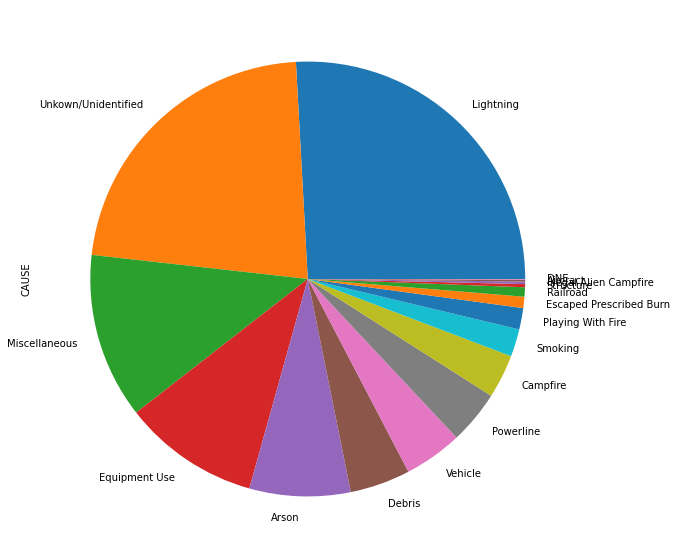

        YEAR_              ALARM_DATE               CONT_DATE  \
0      2020.0  2020/06/18 00:00:00+00  2020/06/23 00:00:00+00   
1      2020.0  2020/06/01 00:00:00+00  2020/06/04 00:00:00+00   
2      2020.0  2020/08/10 00:00:00+00  2020/03/01 00:00:00+00   
3      2020.0  2020/03/31 00:00:00+00  2020/04/01 00:00:00+00   
4      2020.0  2020/04/14 00:00:00+00  2020/04/19 00:00:00+00   
...       ...                     ...                     ...   
21312  2019.0  2019/10/21 00:00:00+00  2019/10/22 00:00:00+00   
21314  2019.0  2019/10/28 00:00:00+00  2019/10/28 00:00:00+00   
21315  2019.0  2019/11/09 00:00:00+00  2019/11/10 00:00:00+00   
21316  2019.0                     NaN                     NaN   
21317  2019.0  2019/10/10 00:00:00+00  2019/10/31 00:00:00+00   

                         CAUSE    GIS_ACRES                  C_METHOD  \
0                    Powerline   109.602500                GPS Ground   
1                Equipment Use   685.585020                GPS Ground   


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

#Causes
# 1 - Lightning
# 2 - Equipment Use
# 3 - Smoking
# 4 - Campfire
# 5 - Debris
# 6 - Railroad
# 7 - Arson
# 8 - Playing With Fire
# 9 - Miscellaneous
# 10 - Vehicle
# 11 - Powerline
# 12 - 
# 13 - 
# 14 - Unknown/Unidentified
causes = {1:"Lightning", 2:"Equipment Use", 3:"Smoking", 4:"Campfire", 5:"Debris", 6:"Railroad", 7:"Arson", 8:"Playing With Fire",
          9: "Miscellaneous", 10:"Vehicle", 11:"Powerline", 12:"DNE", 13:"DNE", 14:"Unkown/Unidentified", 15:"Structure", 16:"Aircract", 18:"Escaped Prescribed Burn", 19:"Illegal Alien Campfire"}
#C_Method
# 1 - GPS Ground
# 2 - GPS Air
# 3 - Infrared
# 4 - Other Imagery
# 5 - Photo Interpretation
# 6 - Hand Drawn
# 7 - Mixed Collection Methods
# 8 - Unknown
C_Methods = {1.0:"GPS Ground", 2.0:"GPS Air", 3.0:"Infrared", 4.0:"Other Imagery", 5.0:"Photo Interpretation", 6.0:"Hand Drawn", 7.0:"Mixed Collection Methods", 8:"Unknown"}

#declaring a list of columns we dont care about to remove later
ignoreLabels = ["OBJECTID", "STATE", "AGENCY" , "UNIT_ID",  "FIRE_NAME", "INC_NUM", "COMMENTS", "REPORT_AC", "OBJECTIVE", "FIRE_NUM"]

#getting the .csv data as pandas dataframe
firesAll = pd.read_csv("California_Fire_Perimeters_(all).csv")

#cleaning the data
firesAll.drop(labels=ignoreLabels, axis=1, inplace=True) #gets rid of columns that we know are not useful for this study
firesAll.CAUSE.replace(causes, inplace=True) #substitutes the number value for causes with the appropriate string
firesAll.C_METHOD.replace(C_Methods, inplace=True) #substitues provided number value for text description
firesAll.dropna(axis=0, subset=["CAUSE"], inplace=True) #gets rid of rows in cause that do not exist
firesAll.dropna(axis=0, subset=["C_METHOD"], inplace=True) #gets rid of rows in cause that do not exist
firesAll.drop

#prepping data for plotting
# causesCount = pd.DataFrame({"Lightning":firesAll["CAUSE"].value_counts})
causesCount = firesAll["CAUSE"].value_counts()
# print(causesCount)


#plot the data
#plot the pie chart for causes to determine which are most prevalent
pieCauses = causesCount.plot(kind="pie", figsize=(10,10)) 

plt.show()

print(firesAll)

As seen in the above graph, a large portion of fires with identifiable causes were from lightning as supposed to being caused by human intervention. However, what is the ratio of storms that caused fires to storms that did not? An answer is revealed by comparing the dates of fires caused by lightning with the dates of when storms were over California. Optimally the location of the storm would be compared as well, however the precision of the data for where the fire started is not accurate enough to pinpoint precisely when and where the storm and fire would have overlapped. Instead, this study will compare the days (if that data exists) of when fires broke out from lightning and the storm that day vs. the total number of storms. This comparison lets us determine whether or not it would be an effective strategy to target storms as a time for intense fire caution compared to attempting to enforce regulations to limit human-caused fires.